<a href="https://colab.research.google.com/github/gopikamuruganantham/Skill_Upgrade_task/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load California Housing dataset
housing = fetch_california_housing()

# Convert to DataFrame
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Display the first few rows of the dataframe
print(X.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 0.7455813830127763
R-squared (R2): 0.575787706032451


In [ ]:
# Example of making a prediction on new data
new_data = pd.DataFrame({
    'MedInc': [8.3252],
    'HouseAge': [41.0],
    'AveRooms': [6.9841],
    'AveBedrms': [1.0238],
    'Population': [322.0],
    'AveOccup': [2.5556],
    'Latitude': [37.88],
    'Longitude': [-122.23]
})

# Preprocess the new data similarly to how training data was processed
new_data_scaled = scaler.transform(new_data)
predicted_price = model.predict(new_data_scaled)
print(f"Predicted Median House Price: ${predicted_price[0]*100000:.2f}")


Predicted Median House Price: $415193.84


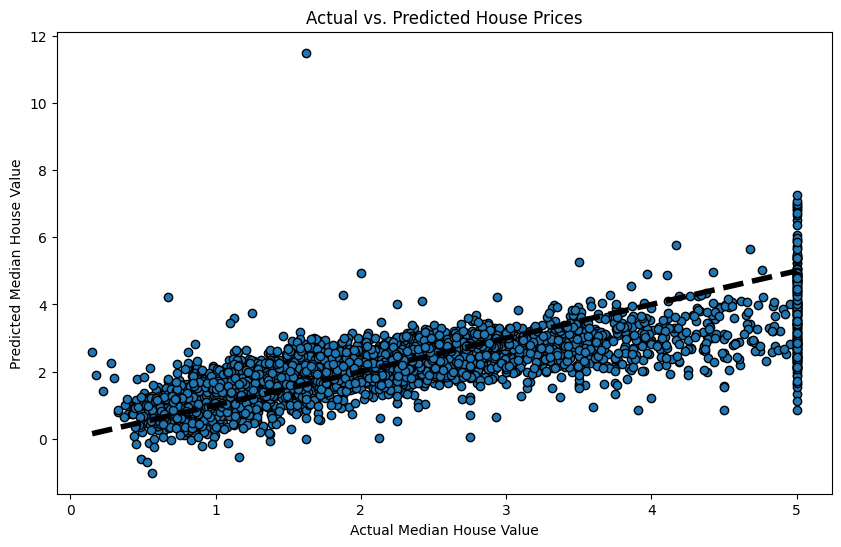

In [ ]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted House Prices')
plt.show()


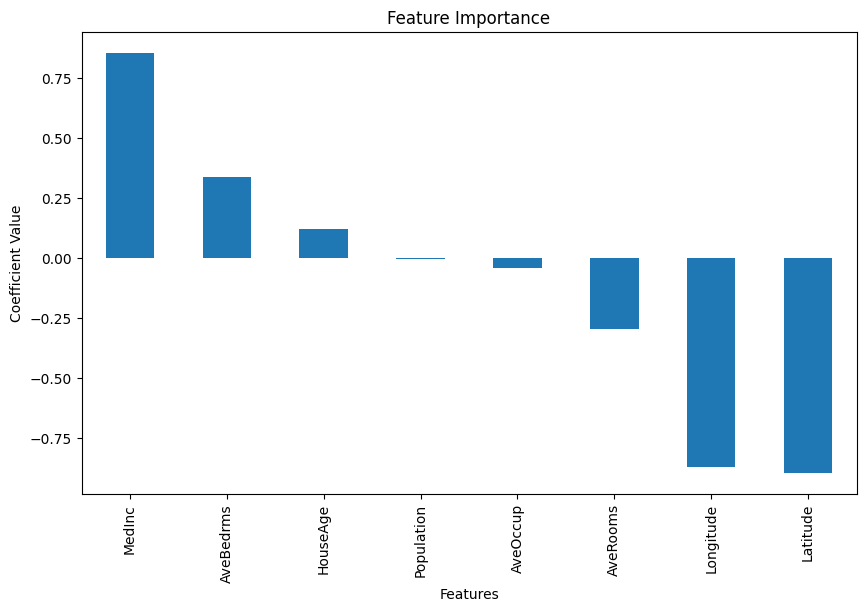

In [ ]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {np.sqrt(mse_rf)}")
print(f"Random Forest R-squared: {r2_rf}")



Random Forest RMSE: 0.5051432839771741
Random Forest R-squared: 0.8052747336256919


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}")


Cross-Validation RMSE: 0.7307403363151839 ± 0.13027275454841383


In [ ]:
import folium

# Create a map centered around the average location in the dataset
m = folium.Map(location=[X['Latitude'].mean(), X['Longitude'].mean()], zoom_start=8)

# Add markers for predicted house prices
for i in range(len(X_test)):
    folium.Marker(
        location=[X_test[i, -2], X_test[i, -1]],  # Assuming the last two features are Latitude and Longitude
        popup=f"Predicted Price: ${y_pred[i]*100000:.2f}"
    ).add_to(m)

# Display the map
m


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting RMSE: {np.sqrt(mse_gb)}")
print(f"Gradient Boosting R-squared: {r2_gb}")


Gradient Boosting RMSE: 0.5422167577867202
Gradient Boosting R-squared: 0.7756433164710084
